<a href="https://colab.research.google.com/github/kanjamwingirwa/Preditiction/blob/main/Spam_Ham_Classification_using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the Question**
There are specific words that are likely to indicate whether an email is ham or spam. Hp collected spam emails from the postmaster. This model aims to determine which words are likely to be found in spam/ham emails accordingly.

**Defining the Metric for Success**
A model of at least 80% accuracy. Compare the different models and use different partitions. 

**Understanding the Context**
Words such as 'george' and '650' show that an email is non spam while '!' and a lot of capital letters show that an email is spam. To put it simply, the more exclamation marks and capital letters, the higher the chance that an email is spam.

**Recording the Experimental Design**

Data cleaning and preparation

Exploratory Data Analysis:MultiVariate and Bivariate Analysis

Modelling: Naive Bayes using the Gaussian
Conclusions

# Data Preparation and Cleansing 

In [ ]:
#load the most basic libraries for reading and loading data
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
spambase = pd.read_csv('spambase.data',  header = None,)
spambase.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#check the tail as well 
spambase.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
#check the data types
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [ ]:
# Determining the number of rows and columns in our dataset
#
print('This dataset has',spambase.shape[0],'rows and',spambase.shape[1],'columns')

This dataset has 4601 rows and 58 columns


In [ ]:
#let's begin by naming the colums. Each of the columns represents the frequency of that particular word in the text. The final column shows us wherther the text is classified as ham or spam, 1= spam, 0=ham
spambase.columns = ['make', 'address','all','3d', 'our','over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people','report','addresses', 'free', 'business','email', 'you', 'credit', 'your','font','000','money', 'hp', 'hpl','george','650','lab', 'labs', 'telnet', '857','data','415','85','technology','1999','parts', 'pm', 'direct','cs', 'meeting','original','project','re','edu','table','conference',';','(','[','!','$','#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','Spam']
spambase.head(5)

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,;,(,[,!,$,#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#let's change the last column into category
spambase['Spam']= spambase['Spam'].astype('category')

In [ ]:
#check the data types again
spambase.info()
#we note that the change has been implemented

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   make                        4601 non-null   float64 
 1   address                     4601 non-null   float64 
 2   all                         4601 non-null   float64 
 3   3d                          4601 non-null   float64 
 4   our                         4601 non-null   float64 
 5   over                        4601 non-null   float64 
 6   remove                      4601 non-null   float64 
 7   internet                    4601 non-null   float64 
 8   order                       4601 non-null   float64 
 9   mail                        4601 non-null   float64 
 10  receive                     4601 non-null   float64 
 11  will                        4601 non-null   float64 
 12  people                      4601 non-null   float64 
 13  report            

In [ ]:
# Identifying the Missing Data
spambase.isnull().sum()
#no missing data identified

make                          0
address                       0
all                           0
3d                            0
our                           0
over                          0
remove                        0
internet                      0
order                         0
mail                          0
receive                       0
will                          0
people                        0
report                        0
addresses                     0
free                          0
business                      0
email                         0
you                           0
credit                        0
your                          0
font                          0
000                           0
money                         0
hp                            0
hpl                           0
george                        0
650                           0
lab                           0
labs                          0
telnet                        0
857     

In [ ]:
spambase.head(5)

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,;,(,[,!,$,#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#lets delete the two capital and leave the total 
spambase = spambase.drop(['capital_run_length_average','capital_run_length_longest'], axis=1)
spambase.head(5)

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,000,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,;,(,[,!,$,#,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,191,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


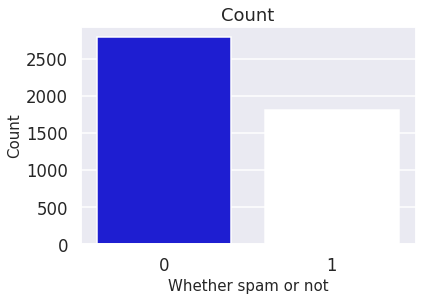

In [ ]:
#lets determine the percentage of spam vs ham
sns.countplot('Spam', data = spambase)
plt.xlabel('Whether spam or not', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count')
plt.show()

Generally, there is less spam than ham emails.

In [ ]:
spambase.columns

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', ';', '(', '[', '!', '$', '#', 'capital_run_length_total',
       'Spam'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

MultiVariate Analysis 

In [ ]:
#from the above, it seems there are too many variables to deal with. In light of this, we choose a few variables that 
#feel are strongly correlated with the spam. Let us do some dimensionality reduction
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = spambase.drop('Spam', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=21).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['make', 'address','all','3d', 'our','over', 'remove', 'internet', 'order', 
                                              'mail', 'receive', 'will', 'people','report','addresses', 'free', 'business','email',
                                              'you', 'credit', 'your','font','000','money', 'hp', 'hpl','george','650','lab', 'labs', 'telnet', 
                                              '857','data','415','85','technology','1999','parts', 'pm', 'direct','cs', 'meeting','original','project',
                                              're','edu','table','conference',';','(','[','!','$','#','capital_run_length_average',
                                              'capital_run_length_longest','capital_run_length_total']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
Newdf = pd.DataFrame(dic.items())
Newdf

,0,1
0,PC0,capital_run_length_average
1,PC1,george
2,PC2,you
3,PC3,you
4,PC4,3d
5,PC5,address
6,PC6,your
7,PC7,font
8,PC8,re
9,PC9,edu


In [ ]:
#let's create a new dataframe with the most important variables
spambasedf= spambase[['capital_run_length_total', 'george', 'you',
                      '3d', 'address', 'your', 'font', 're', 'edu', 'lab', 'will', 'free', '!', 'hpl', 'our','mail', 'project','data','email', 'Spam']].copy()
spambasedf.head(5)                      

,capital_run_length_total,george,you,3d,address,your,font,re,edu,lab,will,free,!,hpl,our,mail,project,data,email,Spam
0,278,0.0,1.93,0.0,0.64,0.96,0.0,0.00,0.00,0.0,0.64,0.32,0.778,0.0,0.32,0.00,0.0,0.0,1.29,1
1,1028,0.0,3.47,0.0,0.28,1.59,0.0,0.00,0.00,0.0,0.79,0.14,0.372,0.0,0.14,0.94,0.0,0.0,0.28,1
2,2259,0.0,1.36,0.0,0.00,0.51,0.0,0.06,0.06,0.0,0.45,0.06,0.276,0.0,1.23,0.25,0.0,0.0,1.03,1
3,191,0.0,3.18,0.0,0.00,0.31,0.0,0.00,0.00,0.0,0.31,0.31,0.137,0.0,0.63,0.63,0.0,0.0,0.00,1
4,191,0.0,3.18,0.0,0.00,0.31,0.0,0.00,0.00,0.0,0.31,0.31,0.135,0.0,0.63,0.63,0.0,0.0,0.00,1


In [ ]:
spambasedf.columns

Index(['capital_run_length_total', 'george', 'you', '3d', 'address', 'your',
       'font', 're', 'edu', 'lab', 'will', 'free', '!', 'hpl', 'our', 'mail',
       'project', 'data', 'email', 'Spam'],
      dtype='object')

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

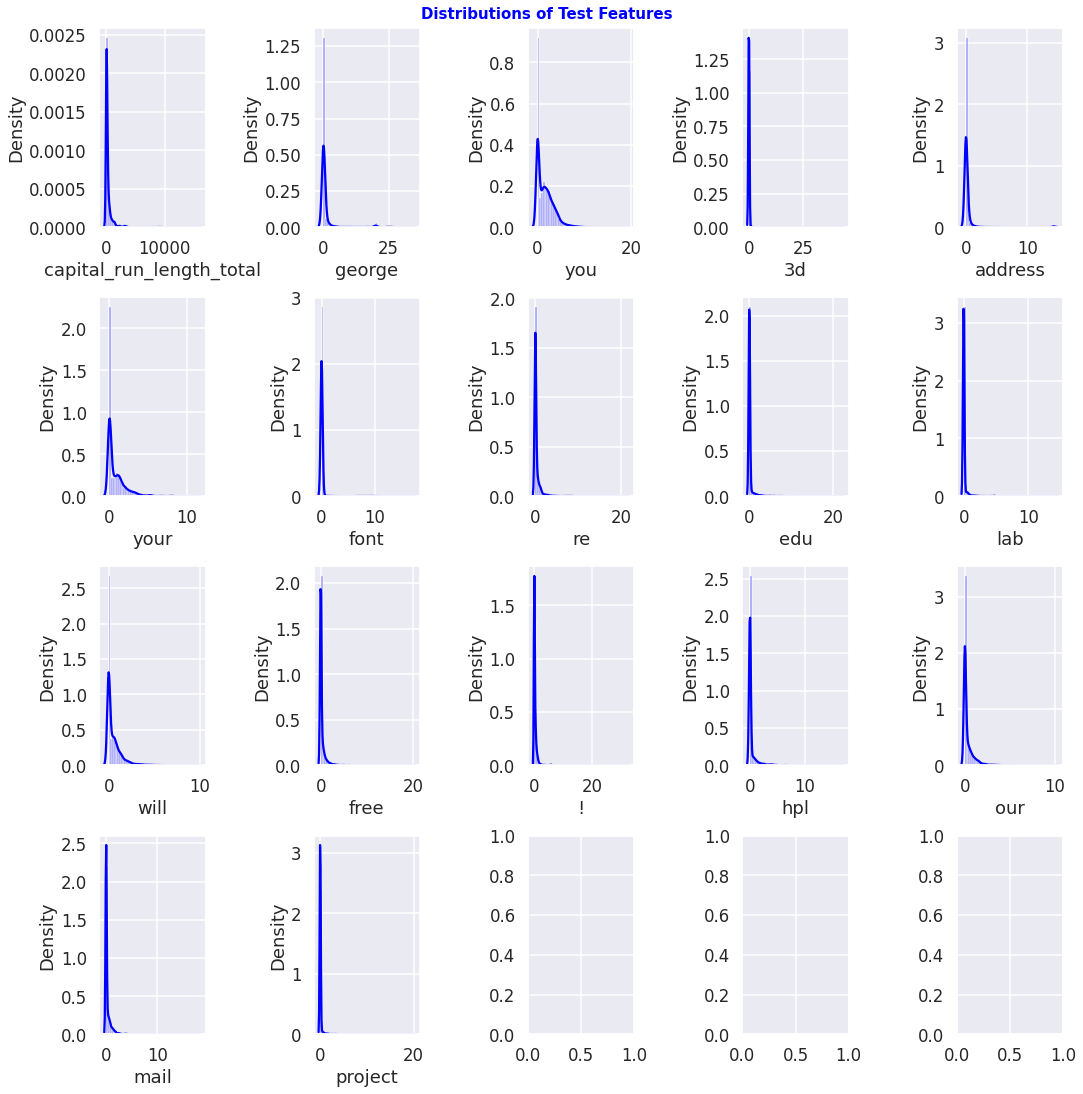

In [ ]:
# Histograms of the columns

# First we create an array of the columns
columns = ['capital_run_length_total', 'george', 'you', '3d', 'address', 'your',
       'font', 're', 'edu', 'lab', 'will', 'free', '!', 'hpl', 'our', 'mail',
       'project']

#visualizing the distributions using histograms
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=4, ncols = 5, figsize = (15, 15))
fig.suptitle('Distributions of Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')
for ax, data, name in zip(axes.flatten(), spambasedf, columns):
  sb.distplot(spambasedf[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

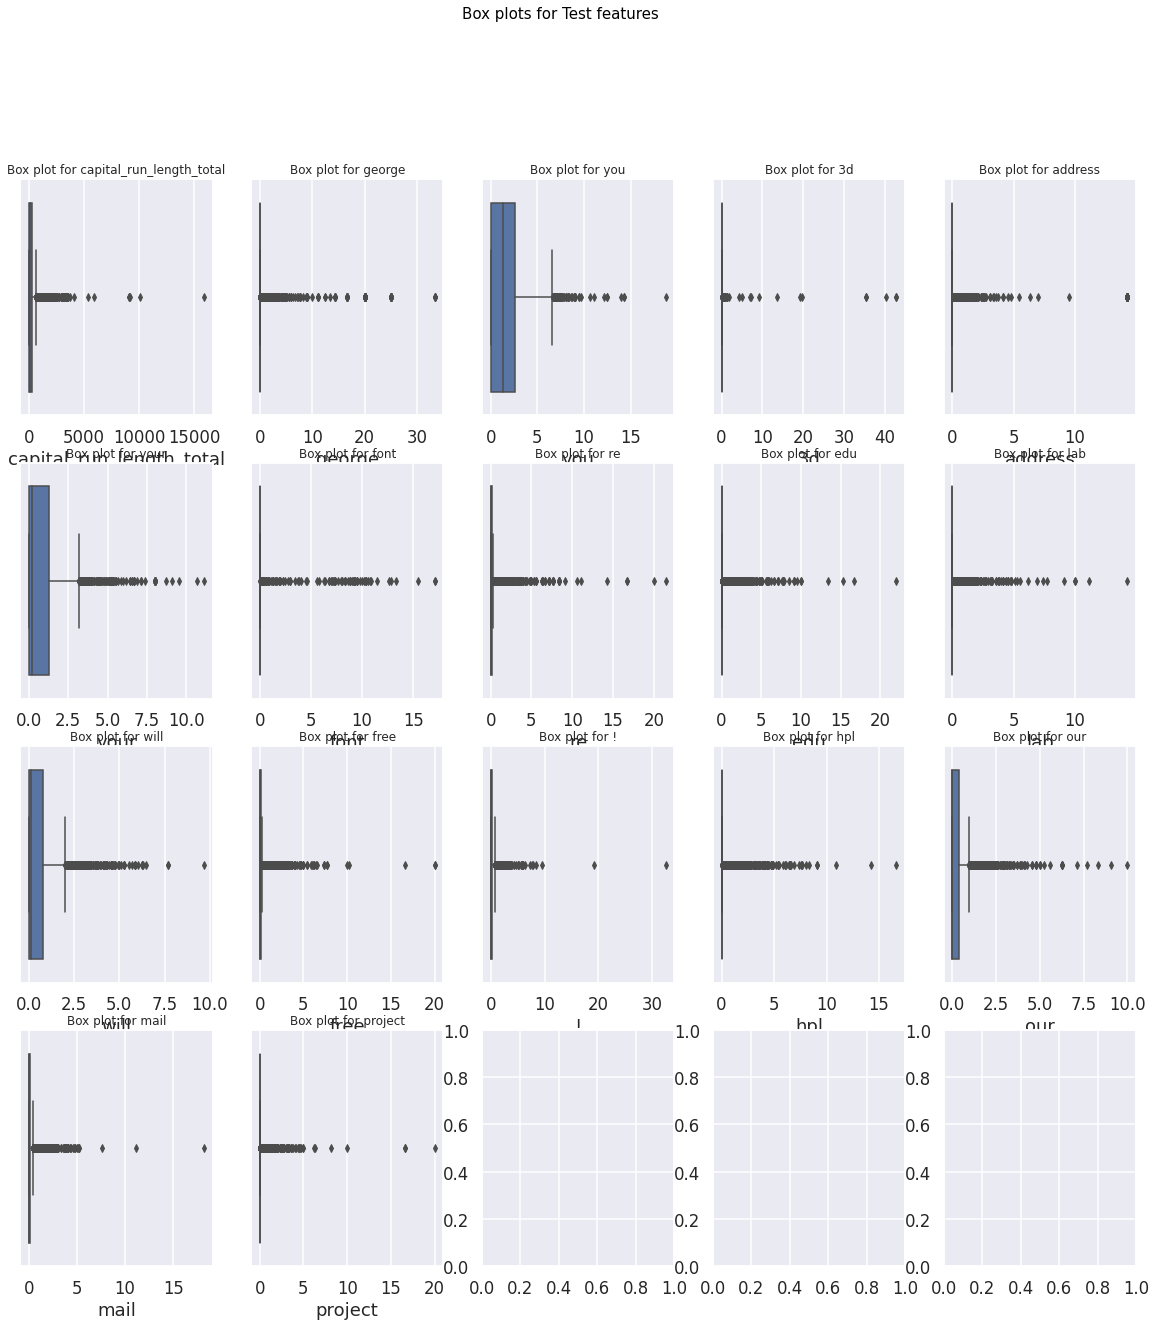

In [ ]:
# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 4, ncols = 5, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Test features', y= 1, color = 'black', fontsize = 15)

sb.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), spambasedf, columns):
  sb.boxplot(spambasedf[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()
#there are several outliers but none shall be removed

Bivariate Analysis

In [ ]:
# Let's display the correlations between the variables
corr = spambasedf.corr()
corr

,capital_run_length_total,george,you,3d,address,your,font,re,edu,lab,will,free,!,hpl,our,mail,project,data,email
capital_run_length_total,1.000000,-0.096548,-0.007307,0.021369,-0.022680,0.051797,0.103954,-0.095444,-0.046371,-0.056628,0.020076,0.003007,0.036321,-0.059601,0.002492,0.087273,-0.040661,0.006919,0.046364
george,-0.096548,1.000000,-0.154758,-0.010684,-0.030307,-0.126247,-0.026931,-0.006860,-0.039175,0.029776,-0.119059,-0.001308,-0.067500,0.010728,-0.088011,-0.067817,-0.013011,-0.020900,-0.067658
you,-0.007307,-0.154758,1.000000,-0.010834,-0.055476,0.304986,-0.023681,0.098270,-0.009787,-0.086828,0.088045,0.081897,0.153381,-0.162800,0.098510,0.093509,-0.065022,-0.098570,0.094580
3d,0.021369,-0.010684,-0.010834,1.000000,-0.006923,0.008176,0.028102,-0.012957,-0.009181,-0.007798,-0.019221,0.007432,-0.003138,-0.013708,0.003238,-0.004947,-0.005933,-0.008075,0.019391
address,-0.022680,-0.030307,-0.055476,-0.006923,1.000000,-0.018191,-0.008850,-0.016418,-0.023858,-0.021940,-0.040398,-0.009117,-0.014461,-0.038211,-0.023760,0.032962,-0.019739,-0.024903,0.033500
your,0.051797,-0.126247,0.304986,0.008176,-0.018191,1.000000,-0.021361,-0.043310,-0.081662,-0.065026,0.105631,0.102815,0.084017,-0.135311,0.136605,0.098072,-0.059901,-0.080787,0.137954
font,0.103954,-0.026931,-0.023681,0.028102,-0.008850,-0.021361,1.000000,-0.032059,-0.020849,-0.019702,-0.045031,-0.006885,-0.004838,-0.035020,-0.020207,0.008200,-0.011931,-0.019311,-0.026496
re,-0.095444,-0.006860,0.098270,-0.012957,-0.016418,-0.043310,-0.032059,1.000000,0.043454,-0.010829,-0.088843,-0.045653,0.067569,-0.007137,-0.042336,-0.032065,-0.004127,0.001309,-0.047838
edu,-0.046371,-0.039175,-0.009787,-0.009181,-0.023858,-0.081662,-0.020849,0.043454,1.000000,-0.023578,-0.071947,-0.047441,-0.028845,-0.037212,-0.077986,-0.030326,-0.015001,-0.019852,-0.039857
lab,-0.056628,0.029776,-0.086828,-0.007798,-0.021940,-0.065026,-0.019702,-0.010829,-0.023578,1.000000,0.101684,-0.046255,-0.042330,0.222459,0.032048,-0.026903,-0.003276,-0.001187,-0.051942


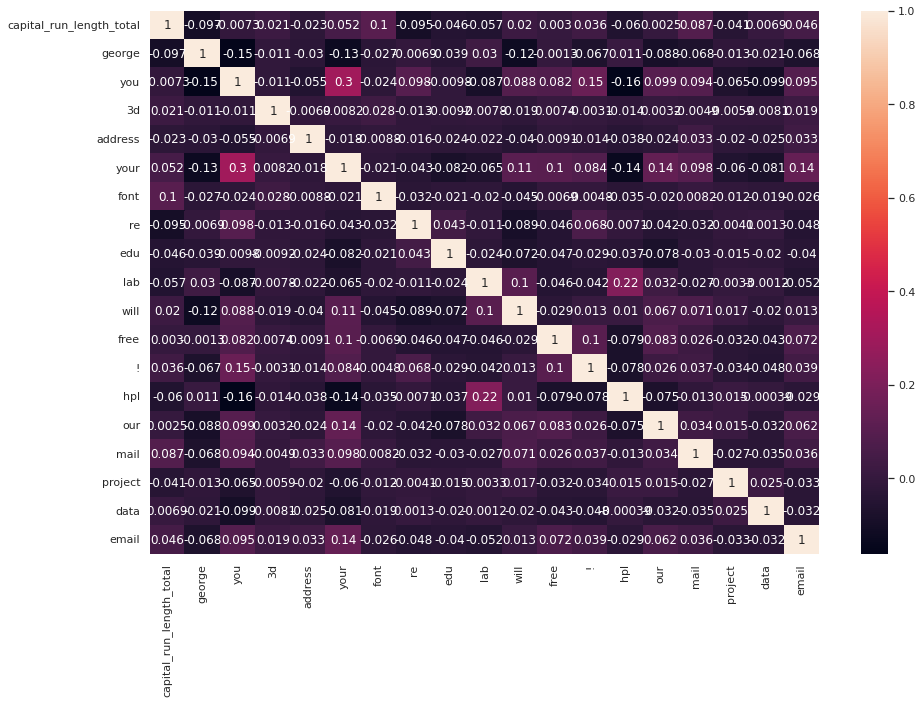

In [ ]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

Correlation Analysis 
1. There is a correlation btn you and your also as expected. 
2. There is a somewhat strong correlation between hpl and lab, your and our; free and your

In [ ]:
#I want to see how each of these variables relates with the target variable
spambasedf.drop("Spam", axis=1).apply(lambda x: x.corr(spambasedf.Spam))

capital_run_length_total    0.249164
george                     -0.183404
you                         0.273651
3d                          0.057371
address                    -0.030224
your                        0.383234
font                        0.091860
re                         -0.140408
edu                        -0.146138
lab                        -0.133523
will                        0.007741
free                        0.263215
!                           0.241888
hpl                        -0.232968
our                         0.241920
mail                        0.138962
project                    -0.094594
data                       -0.119931
email                       0.204208
dtype: float64

The word 'your' has the greatest positive correlation with spam and the word 'hpl' has the greatest negative correlation. 

# **Modelling Using Naive Bayes**

In [ ]:
#Train the model without optimization
#split data
X = spambasedf.drop(['Spam'],1)
y = spambasedf['Spam']

#train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

#model training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

#predict
y_pred = gnb.predict(X_test)

#model evaluattion
from sklearn import metrics
print('accuracy score',metrics.accuracy_score(y_test,y_pred))

accuracy score 0.7643865363735071


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

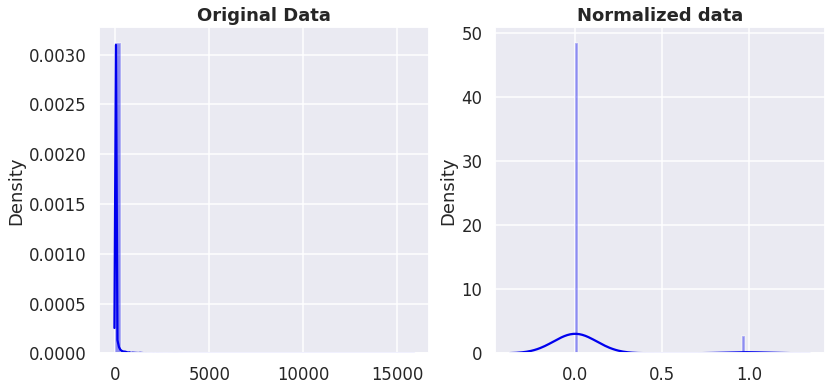

In [ ]:
#improve model performnace by normalizing
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l1')
df = spambasedf.drop(['Spam'],1)
#normalized_data = stats.boxcox(original_data)
normalized_data = normalizer.fit_transform(df)
# plot both together to compare
sns.set(rc = {'figure.figsize':(13,6)})
sns.set_context('talk')
sns.set_palette('flag_r')
fig, ax=plt.subplots(1,2)
sns.distplot(df, ax=ax[0])
ax[0].set_title('Original Data',weight='bold')
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data",weight='bold')

In [ ]:
#model training
spambasedf.head()
#split data
X = normalized_data
y = spambasedf['Spam']

#train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

#model training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

#predict
y_pred = gnb.predict(X_test)

#model evaluattion
from sklearn import metrics
print('accuracy score',metrics.accuracy_score(y_test,y_pred))

accuracy score 0.7209554831704669


The accuracy score decreased. 

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)
#confusion_matrix(y, y_pred)


Confusion matrix : 
 [[365  18]
 [239 299]]


In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.95      0.74       383
           0       0.94      0.56      0.70       538

    accuracy                           0.72       921
   macro avg       0.77      0.75      0.72       921
weighted avg       0.80      0.72      0.72       921



In [ ]:
#Train the model without optimization
#split data
X = spambasedf.drop(['Spam'],1)
y = spambasedf['Spam']

#train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)

#model training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

#predict
y_pred = gnb.predict(X_test)

#model evaluattion
from sklearn import metrics
print('accuracy score',metrics.accuracy_score(y_test,y_pred))

accuracy score 0.7697320782041999


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

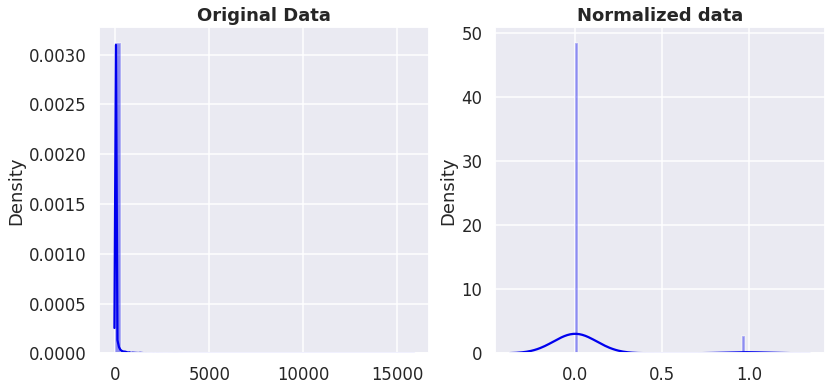

In [ ]:
#improve model performnace by normalizing
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l1')
df = spambasedf.drop(['Spam'],1)
#normalized_data = stats.boxcox(original_data)
normalized_data = normalizer.fit_transform(df)
# plot both together to compare
sns.set(rc = {'figure.figsize':(13,6)})
sns.set_context('talk')
sns.set_palette('flag_r')
fig, ax=plt.subplots(1,2)
sns.distplot(df, ax=ax[0])
ax[0].set_title('Original Data',weight='bold')
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data",weight='bold')

In [ ]:
#Train the model without optimization
#split data
X = spambasedf.drop(['Spam'],1)
y = spambasedf['Spam']

#train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state=0)

#model training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

#predict
y_pred = gnb.predict(X_test)

#model evaluattion
from sklearn import metrics
print('accuracy score',metrics.accuracy_score(y_test,y_pred))

accuracy score 0.7734926670287887


The best split is the 60-40 as it gives the highest accuracy

More hyperparameter tuning is required in order to make this prediction more accurate

**Is the data enough? **It is enough. However, it would be nice to get full sentences in the sense that one cannot judge whether a text is ham or spam basing on a single word. The inclusion of an exclamation mark for instance should not automatically mean that the text is spam since even in normal conversations, exclamation marks are often used. Sentences would have been more helpful. 

**Conclusion**
An accuracy of 77% is fairly ok but there may have been some underfitting. More complete sentences would have been better to use. 